In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [112]:
# Загрузка данных / chunksize=None
df = pd.read_csv('Churn_Modelling1.csv', index_col = 'RowNumber')

In [113]:
df.shape

(10000, 13)

In [114]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [115]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Визуализация

# 1. признаки по одному
### 1.1. количественные

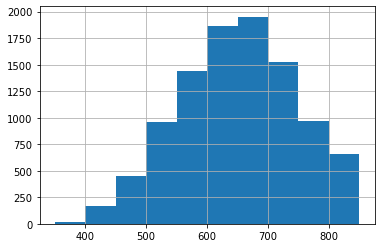

In [117]:
df['CreditScore'].hist();

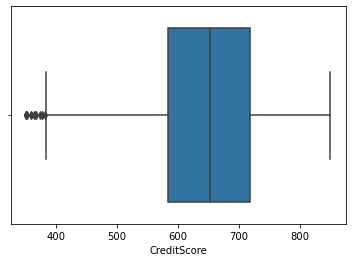

In [118]:
# ящик с усами
sns.boxplot(x = df['CreditScore']);

In [119]:
df['CreditScore'].median()

652.0

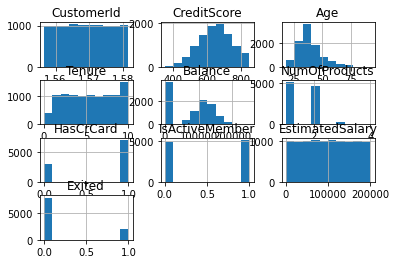

In [120]:
df.hist();

<AxesSubplot:>

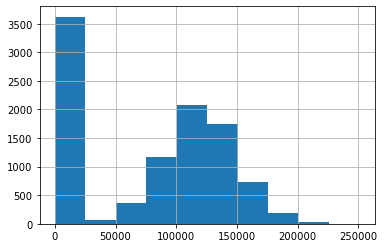

In [121]:
df['Balance'].hist()

### 1.2. Категориальные 

In [122]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [124]:
# most interest
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

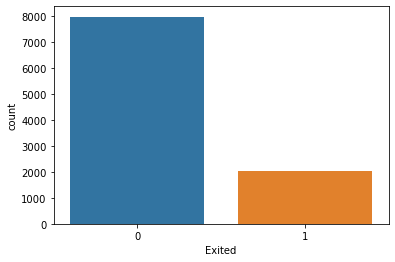

In [125]:
# seaborn
sns.countplot(x = df['Exited']);

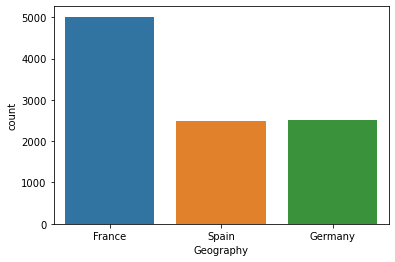

In [126]:
sns.countplot(x = df['Geography']);

In [127]:
df['Surname'].value_counts().head()

Smith     32
Scott     29
Martin    29
Walker    28
Brown     26
Name: Surname, dtype: int64

In [128]:
ind = df['Surname'].value_counts().head().index

In [129]:
df['Surname'].isin(ind)

RowNumber
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000     True
Name: Surname, Length: 10000, dtype: bool

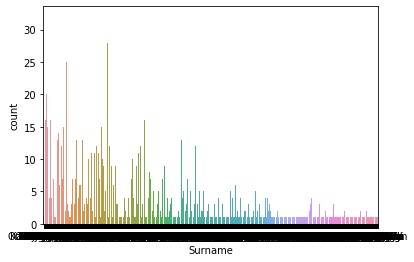

In [130]:
# опасно
sns.countplot(x = df['Surname']);

In [131]:
df[df['Surname'].isin(df['Surname'].value_counts().head().index)]
#sns.countplot(x = df[df['Surname'].isin(df['Surname'].value_counts().head().index)]['Surname']);

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
235,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
327,15601848,Scott,594,France,Male,35,2,0.00,2,1,0,103480.69,0
346,15763859,Brown,840,France,Female,43,7,0.00,2,1,0,90908.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,15694628,Walker,686,Germany,Female,39,4,157731.60,2,1,0,162820.60,0
9921,15673020,Smith,678,France,Female,49,3,204510.94,1,0,1,738.88,1
9964,15814664,Scott,740,Germany,Male,33,2,126524.11,1,1,0,136869.31,0


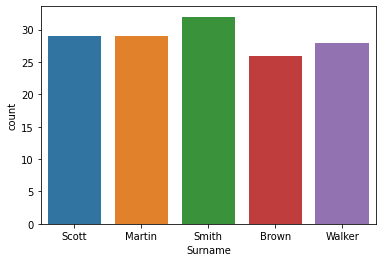

In [132]:
sns.countplot(x = df[df['Surname'].isin(df['Surname'].value_counts().head().index)]['Surname']);

# 2. Взаимодействие признаков
### 2.1. Количествнные с количественными

In [133]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [134]:
factors = ['CreditScore','Age','EstimatedSalary','Balance']

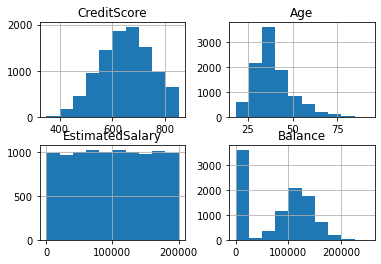

In [135]:
df[factors].hist();

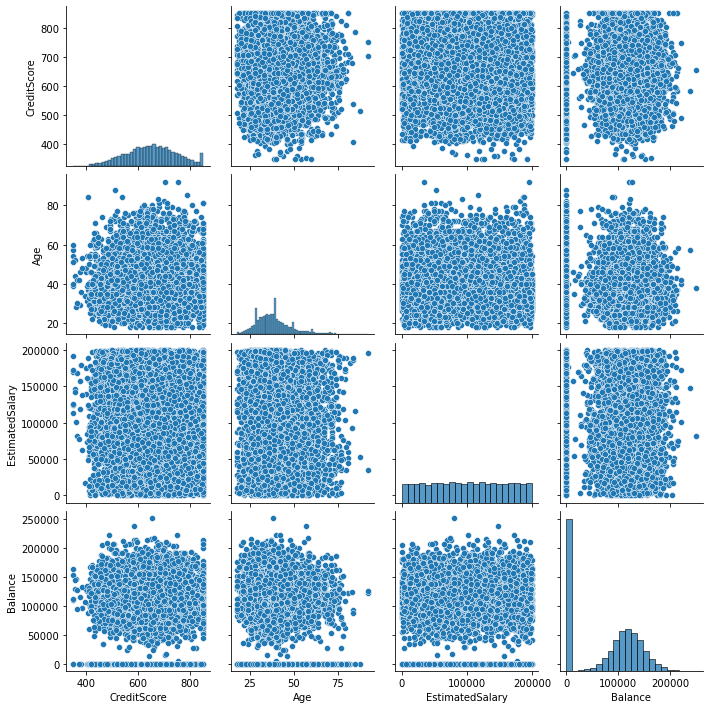

In [136]:
sns.pairplot(df[factors])

Text(0, 0.5, 'Баланс')

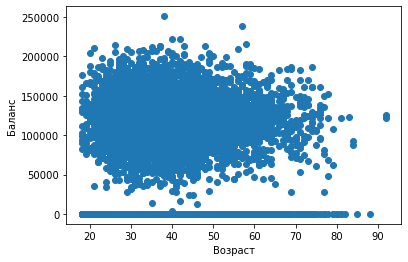

In [137]:
# 2 признака 
plt.scatter(df['Age'], df['Balance'])
#plt.scatter(df['Age'], df['Balance'], color = 'green')
#plt.scatter(df['Age'], df['Balance'], color = df['Exited'].map({0:'blue', 1:'orange'}))
plt.xlabel('Возраст')
plt.ylabel('Баланс')

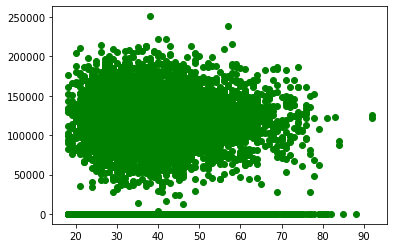

In [138]:
plt.scatter(df['Age'], df['Balance'], color = 'green')

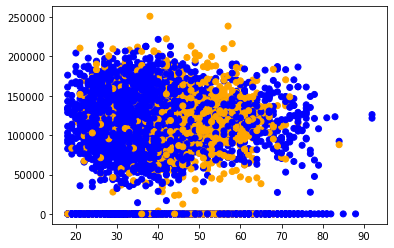

In [139]:
plt.scatter(df['Age'], df['Balance'], color = df['Exited'].map({0:'blue', 1:'orange'}))

In [16]:
#df['Exited'].map({0:'green', 1:'red'})

In [17]:
#plt.scatter(df['Age'], df['Balance'], color = 'green')

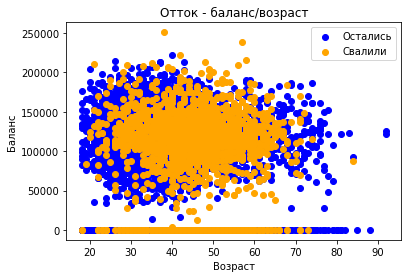

In [34]:
plt.scatter(df[df['Exited']==0]['Age'], df[df['Exited']==0]['Balance'], color = 'blue', label = 'Остались')
plt.scatter(df[df['Exited']==1]['Age'], df[df['Exited']==1]['Balance'], color = 'orange', label = 'Свалили')
df[df['Exited']==0]
plt.xlabel('Возраст')
plt.ylabel('Баланс')
plt.title('Отток - баланс/возраст')
plt.legend()

<AxesSubplot:>

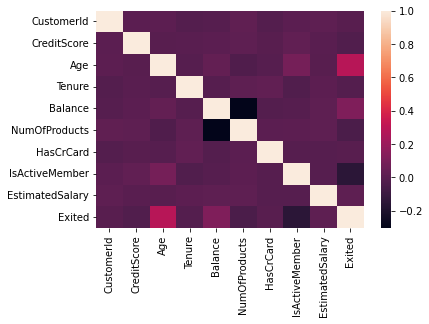

In [35]:
sns.heatmap(df.corr())

In [38]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [37]:
pd.drop()
# axis, inplace

AttributeError: module 'pandas' has no attribute 'drop'

### 2.2. Колич - Категориальный / Колич - Бинарный

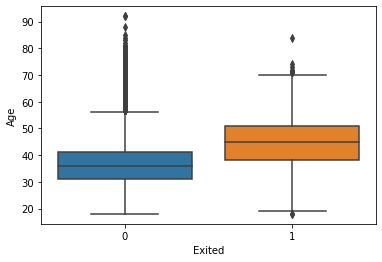

In [13]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

In [14]:
df.Age.value_counts().tail(25)

67    37
66    35
71    27
19    27
18    22
69    22
72    21
68    19
74    18
65    18
70    18
73    13
76    11
77    10
75     9
78     5
79     4
81     4
80     3
84     2
92     2
82     1
88     1
85     1
83     1
Name: Age, dtype: int64

In [16]:
df.Age.value_counts().head()

37    478
38    477
35    474
36    456
34    447
Name: Age, dtype: int64

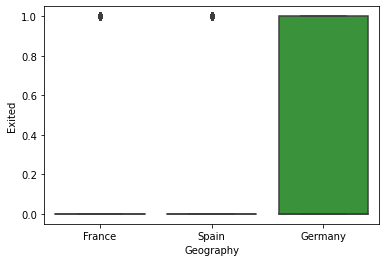

In [17]:
sns.boxplot(x = 'Geography', y = 'Exited', data = df);

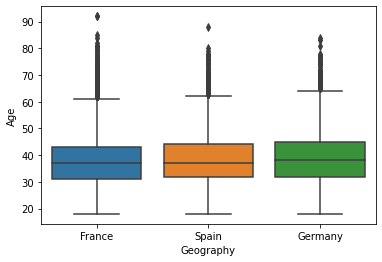

In [18]:
sns.boxplot(x = 'Geography', y = 'Age', data = df);
# по возрасту во всех странах примерно одинаково

In [19]:
df.groupby('Geography')['Balance'].mean()

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

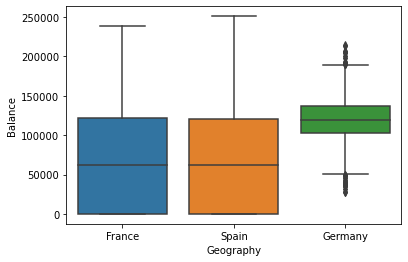

In [20]:
sns.boxplot(x = 'Geography', y = 'Balance', data = df);

### 2.3. Категориальный - категориальный

In [21]:
pd.crosstab(df['Exited'], df['Geography'])

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


<AxesSubplot:xlabel='Geography', ylabel='count'>

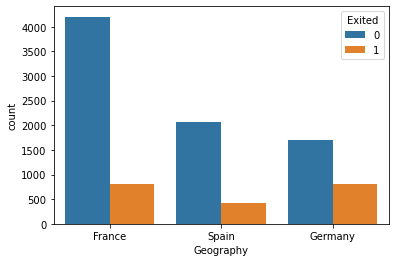

In [22]:
sns.countplot(x = 'Geography', hue = 'Exited', data = df)

In [89]:
from sklearn.manifold import TSNE

In [90]:
tsne = TSNE(random_state = 42)

In [91]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df = df.drop(['CustomerId', 'Surname'], axis = 1)

In [93]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
df['Geography'] = df['Geography'].map({'France': 0, 'Germany':1, 'Spain':2})

In [95]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})

In [96]:
#tsne = TSNE(random_state = 0)

In [97]:
tsne.fit(df)

TSNE(random_state=42)

In [98]:
tsne.embedding_.shape

(10000, 2)

In [99]:
embedding = tsne.fit_transform(df)

In [100]:
embedding.shape

(10000, 2)

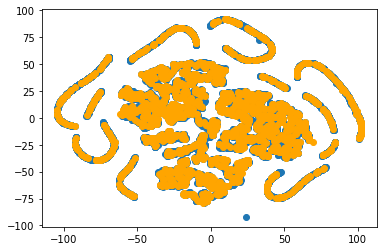

In [101]:
plt.scatter(embedding[df.Exited == 0,0], embedding[df.Exited == 0,1], )
plt.scatter(embedding[df.Exited == 1,0], embedding[df.Exited == 1,1], color = 'orange')

In [104]:
embedding[df.Exited == 0,0]

array([ 18.582302, -80.18841 , -25.8605  , ..., -83.98928 ,  23.211498,
       -31.958467], dtype=float32)

In [102]:
df.Exited == 0,0

(RowNumber
 1        False
 2         True
 3        False
 4         True
 5         True
          ...  
 9996      True
 9997      True
 9998     False
 9999     False
 10000     True
 Name: Exited, Length: 10000, dtype: bool,
 0)

In [103]:
df.Exited == 0,1

(RowNumber
 1        False
 2         True
 3        False
 4         True
 5         True
          ...  
 9996      True
 9997      True
 9998     False
 9999     False
 10000     True
 Name: Exited, Length: 10000, dtype: bool,
 1)

# Все то же самое но с телеком датасетом

In [38]:
df = pd.read_csv('churn-bigml-80.csv')

In [52]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [15]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<AxesSubplot:>

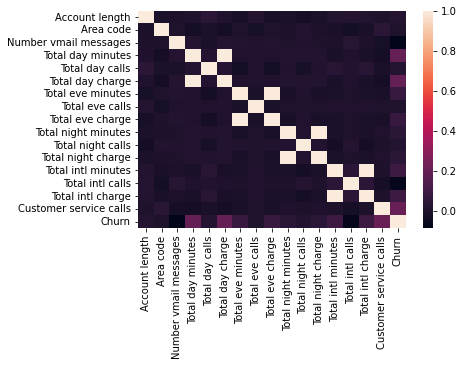

In [40]:
sns.heatmap(df.corr())

In [43]:
df = df.drop(['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes'],axis = 1)

In [41]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [45]:
plt.rcParams["figure.figsize"] = (6,4)

<AxesSubplot:xlabel='State', ylabel='count'>

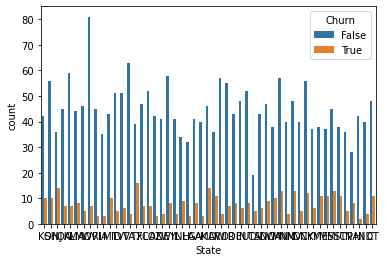

In [46]:
sns.countplot(x = 'State', hue = 'Churn', data = df)

In [47]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

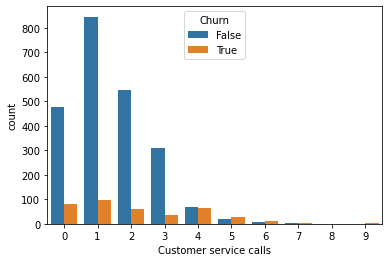

In [48]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df)

<AxesSubplot:xlabel='International plan', ylabel='count'>

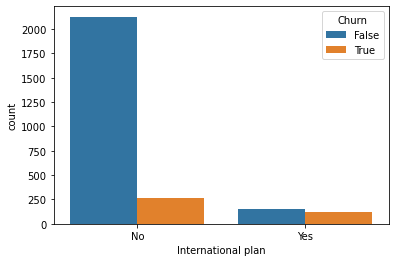

In [49]:
sns.countplot(x = 'International plan', hue = 'Churn', data = df)

# 1. Классификация
(обучение с учителем, количество классов, пакетное/динамическое)

### Дерево решений

In [50]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [51]:
#категориальные поля переписываем в цифры
df['International plan'] = df['International plan'].map({'No':0,'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0,'Yes':1})


In [53]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [54]:
X = df.drop(['State','Account length', 'Area code' , 'Churn'], axis = 1)
Y = df['Churn']

In [1]:
Y

NameError: name 'Y' is not defined

In [55]:
clf.fit(X,Y)

DecisionTreeClassifier()

In [105]:
clf.score(X,Y)

0.5922730682670667

In [106]:
test_df = pd.read_csv('churn-bigml-20.csv')

In [107]:
X_test = test_df.drop(['State','Account length', 'Area code' , 'Churn'], axis = 1)
Y_test = test_df['Churn']

In [108]:
test_df['International plan'] = test_df['International plan'].map({'No':0,'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0,'Yes':1})

In [109]:
test_df = test_df.drop(['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes'],axis = 1)

In [110]:
clf.score(X_test,Y_test)

ValueError: could not convert string to float: 'No'

In [ ]:
# Хорошо ли работает наш алгоритм?

In [ ]:
#def DummyChurn(X):
#    res = np.zeros(len(X))
#    return res

In [ ]:
#def dummyScore (X, ground):
#    return 1-sum(ground-DummyChurn(X))/len(ground)

### Стохастический поиск

In [77]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [78]:
clf.fit(X,Y)

SGDClassifier()

In [79]:
clf.score(X_test,Y_test), clf.score(X,Y)

(0.8185907046476761, 0.8184546136534133)

### Адаптивный бустинг

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
clf.fit(X,Y)

SGDClassifier()

In [82]:
clf.score(X_test,Y_test),clf.score(X,Y)

(0.5787106446776612, 0.5922730682670667)

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
#pred = clf.predict(X_test)
#cm = confusion_matrix (Y_test, pred)

In [111]:
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]


In [112]:
#  TN  FP
#  FN  TP

In [113]:
#precision = TP/(TP+FP)

In [198]:
#precision # правильно определяет отключение только в половине случаев

In [199]:
#recall = TP/(TP+FN)
#recall # обнаруживает только 65 процентов от реально отключившихся

In [200]:
#from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [201]:
#f1_score(Y_test, pred)

In [134]:
#Y_score = clf.decision_function(X)

In [150]:
#ma = Y_score.max() 
#mi = Y_score.min()

In [197]:
#ma, mi

In [163]:
#predict = Y_score > -0.

In [196]:
#precision_score(Y, predict), recall_score(Y, predict)

In [142]:
#pre, rec, tr = precision_recall_curve(Y, Y_score)

In [177]:
#plt.plot(tr, pre[:-1], 'b--', label = 'Precision')
#plt.plot(tr, rec[:-1], 'g--', label = 'Recall')
#plt.xlabel('Порог')
#plt.legend()


In [165]:
#fpr, tpr, tr = precision_recall_curve(Y, Y_score)

In [175]:
#plt.plot(fpr, tpr, linewidth = 2)
#plt.plot([0,1], [1,0], 'g--')
#plt.axis([0,1,0,1])
#plt.xlabel('Полнота')
#plt.ylabel('Точность')

In [178]:
#fpr, tpr, tr = roc_curve(Y, Y_score)

In [195]:
#plt.plot(fpr, tpr, linewidth = 2)
#plt.plot([0,1], [0,1], 'g--')
#plt.axis([0,1,0,1])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

In [193]:
#from sklearn.metrics import roc_auc_score

In [194]:
#roc_auc_score (Y, pred)